# FUNCIÓN DE PRODUCCIÓN: COBB-DOUGLAS

Librerías:

In [1]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

Carga de datos:

In [2]:
datos = "EAS_2018.csv" #archivo con los datos
db = pd.read_csv(datos, sep=';') #we're in
db.head() #vista previa de los datos

idnoremp Seccion18  Division  periodo       intio  pottcag   gppgpa  \
0     10001        I1        55     2018   2661282.0      0.0  30600.0   
1     10002        I1        55     2018   4355860.0      0.0  19692.0   
2     10003        I1        55     2018  14967912.0    115.0  37122.0   
3     10004        I1        55     2018  10666938.0      0.0  21944.0   
4     10005        I2        56     2018  24247713.0    138.0  42248.0   

       ocgtot    CONINTER    OTROSG  ...  gppdocen  gppgpaed1  gppmoni  \
0   1522029.0   1337412.0   89191.0  ...       NaN        NaN      NaN   
1   2410700.0   2355473.0    7845.0  ...       NaN        NaN      NaN   
2  10343391.0   9759456.0   75258.0  ...       NaN        NaN      NaN   
3   5924967.0   5813284.0       0.0  ...       NaN        NaN      NaN   
4  21505783.0  20862660.0  319610.0  ...       NaN        NaN      NaN   

   gppgpned1  gppgpned2  gppgpned3  gpptpoted1  gpptpoted2  gpptpoted3  \
0        NaN        NaN        NaN         NaN         NaN         NaN   
1        NaN        NaN        NaN         NaN         NaN         NaN   
2        NaN        NaN        NaN         NaN         NaN         NaN   
3        NaN        NaN        NaN         NaN         NaN         NaN   
4        NaN        NaN        NaN         NaN         NaN         NaN   

   opcomex  
0        4  
1        4  
2        4  
3        4  
4        4  

[5 rows x 161 columns]

In [3]:
db.shape

(6321, 161)

In [5]:
#db.isna().any()
db.isna().sum()

idnoremp         0
Seccion18        0
Division         0
periodo          0
intio          135
              ... 
gppgpned3     6156
gpptpoted1    6156
gpptpoted2    6156
gpptpoted3    6156
opcomex          0
Length: 161, dtype: int64

In [6]:
#realizo una copia de los datos para no alterar la db original
db_clean = db[['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp', 'ocgnr']]
db_clean.head()

PROBRU       TOTG   insertot  VALAGRE   gppgpa     ocgco    ocgpp  \
0   2661282.0  1095630.0  2518262.0  1323870  30600.0   60127.0   2819.0   
1   4355860.0  1767399.0  2185760.0  2000387  19692.0   23000.0  58000.0   
2  14967912.0  2869476.0  6914281.0  5208456  37122.0   56159.0  30711.0   
3  10666938.0   844514.0  8309250.0  4853654  21944.0   23127.0  54097.0   
4  24247713.0  2698819.0  6779595.0  3385053  42248.0  167731.0      0.0   

       ocgnr  
0   188284.0  
1   177000.0  
2   250014.0  
3   543956.0  
4  3205218.0

In [7]:
db_clean.describe()

PROBRU          TOTG      insertot       VALAGRE        gppgpa  \
count  6.110000e+03  6.112000e+03  6.186000e+03  6.321000e+03  6.112000e+03   
mean   2.894635e+07  9.922812e+06  2.742796e+07  1.505785e+07  5.580526e+04   
std    1.314335e+08  2.635969e+07  1.259099e+08  6.768556e+07  1.838886e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00 -8.053371e+07  0.000000e+00   
25%    3.504062e+06  1.087298e+06  3.135393e+06  1.515383e+06  0.000000e+00   
50%    7.468262e+06  2.510022e+06  6.915932e+06  3.653099e+06  1.431400e+04   
75%    1.991866e+07  7.131559e+06  1.840687e+07  1.020370e+07  4.057450e+04   
max    4.895684e+09  3.688571e+08  4.697085e+09  2.541625e+09  3.789435e+06   

              ocgco         ocgpp         ocgnr  
count  6.112000e+03  6.112000e+03  6.112000e+03  
mean   1.659653e+05  3.059961e+05  5.001060e+05  
std    6.231723e+05  3.273006e+06  3.580351e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.344050e+04  0.000000e+00  1.189125e+04  
50%    3.538500e+04  3.248000e+03  5.890100e+04  
75%    9.732400e+04  4.175275e+04  2.186728e+05  
max    1.611161e+07  1.157845e+08  1.936282e+08

In [8]:
#db_clean['PROBRU']
print(db_clean.corr()['PROBRU'])

PROBRU      1.000000
TOTG        0.630122
insertot    0.998758
VALAGRE     0.969564
gppgpa      0.516531
ocgco       0.591475
ocgpp       0.734462
ocgnr       0.625538
Name: PROBRU, dtype: float64


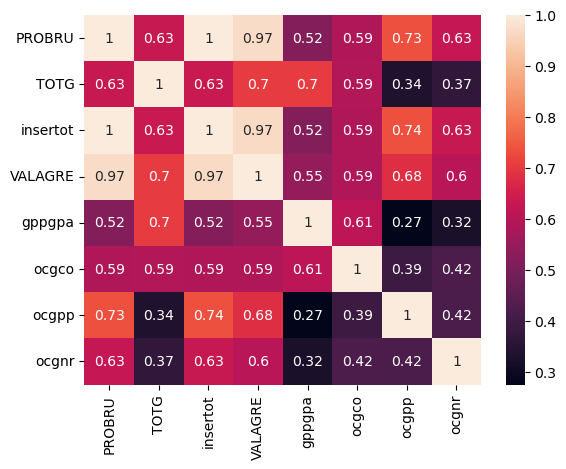

In [9]:
sns.heatmap(db_clean.corr(), annot = True)
#sns.pairplot(data = db_reg, height = 1.5)
plt.show()

In [10]:
#esta sera la database para la regression
db_reg = db_clean.copy()

In [11]:
db_reg.columns

Index(['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp',
       'ocgnr'],
      dtype='object')

In [26]:
#creación de valores ln para cada columna
db_reg[['PROBRU_ln',
        'TOTG_ln',
        'insertot_ln',
        'VALAGRE_ln',
        'gppgpa_ln',
        'ocgco_ln',
        'ocgpp_ln',
        'ocgnr_ln']] = np.log(db_reg[['PROBRU',
                                      'TOTG',
                                      'insertot',
                                      'VALAGRE',
                                      'gppgpa',
                                      'ocgco',
                                      'ocgpp',
                                      'ocgnr']].replace(0, np.nan))

#db_reg.head()
db_reg.tail()

c:\Users\luisr\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


PROBRU        TOTG     insertot   VALAGRE    gppgpa      ocgco  \
6316   33234313.0  14795829.0   33234313.0  18761608  114618.0   173351.0   
6317    1605927.0    912647.0    1605927.0   1123832       0.0    22187.0   
6318    8429044.0   2657213.0    8284954.0   3191922   53929.0   115264.0   
6319    7767900.0   1052156.0    5663907.0   3325598   25807.0     9653.0   
6320  170866257.0  87330632.0  168033961.0  92702494       0.0  3032790.0   

          ocgpp      ocgnr  PROBRU_ln    TOTG_ln  insertot_ln  VALAGRE_ln  \
6316     3408.0    97046.0  17.319093  16.509856    17.319093   16.747323   
6317        0.0    26992.0  14.289212  13.724104    14.289212   13.932255   
6318   360317.0   183225.0  15.947194  14.792788    15.929952   14.976134   
6319        0.0  2768518.0  15.865510  13.866352    15.549624   15.017160   
6320  6429017.0  7189369.0  18.956392  18.285212    18.939677   18.344906   

      gppgpa_ln   ocgco_ln   ocgpp_ln   ocgnr_ln  
6316  11.649360  12.063074   8.133881  11.482940  
6317        NaN  10.007262        NaN  10.203296  
6318  10.895424  11.654980  12.794739  12.118470  
6319  10.158401   9.175024        NaN  14.833823  
6320        NaN  14.924994  15.676332  15.788114

In [27]:
db_reg.columns

Index(['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp',
       'ocgnr', 'PROBRU_ln', 'TOTG_ln', 'insertot_ln', 'VALAGRE_ln',
       'gppgpa_ln', 'ocgco_ln', 'ocgpp_ln', 'ocgnr_ln'],
      dtype='object')

In [28]:
#nespecificando las variables de la regresión
X = db_reg.loc[:, ['TOTG',
                   #'insertot',
                   #'VALAGRE',
                   'gppgpa',
                   'ocgco',
                   'ocgpp',
                   'ocgnr']].values #variables independientes (Xn)

Y = db_reg.loc[:, ['PROBRU']].values #variable dependiente (Y)

X_log = db_reg.loc[:, ['TOTG_ln',
                       #'insertot_ln',
                       #'VALAGRE_ln',
                       'gppgpa_ln',
                       'ocgco_ln',
                       'ocgpp_ln',
                       'ocgnr_ln']].values #variables independientes alt_log (Xn)

Y_log = db_reg.loc[:, ['PROBRU_ln']].values #variable dependiente alt_log (Y)

In [25]:
print(lr.fit(X, Y))
print(lr.score(X, Y)) #R^2
print(lr.coef_) #pendientes de cada variable
print(lr.intercept_) #intercepto de la recta de regresión con Y

LinearRegression()
0.7757132759427805
[[ 1.42082713 27.41876077 20.66202781 19.19732286  9.785637  ]]
[-859775.0755136]


In [29]:
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              4632.
Date:                Thu, 11 May 2023   Prob (F-statistic):                        0.00
Time:                        14:10:35   Log-Likelihood:                     -1.2231e+05
No. Observations:                6321   AIC:                                  2.446e+05
Df Residuals:                    6316   BIC:                                  2.447e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Análisis de R^2

In [85]:
#mejor R2
R2s = []

#R2_lineal
lr.fit(X, Y)
R2 = lr.score(X, Y)
R2s.append((R2, 'LINEAL'))

#R2_log
lr.fit(X_log, Y)
R2 = lr.score(X_log, Y)
R2s.append((R2, 'LOGARÍTMICA'))

#R2_exp
lr.fit(X, Y_log)
R2 = lr.score(X, Y_log)
R2s.append((R2, 'EXPONENCIAL'))

#R2_pot
lr.fit(X_log, Y_log)
R2 = lr.score(X_log, Y_log)
R2s.append((R2, 'POTENCIAL'))

for r2 in R2s:
    print(r2)

max_R2 = max(R2s, key=lambda x: x[0]) #recomendación para modelo
print('\nRECOMENDACIÓN: El mejor R2 ({:.2f}) lo arroja una regresión: {}.'.format(max_R2[0],
                                                                                  max_R2[1]))

(0.7757132759427805, 'LINEAL')
(0.05938894529292882, 'LOGARÍTMICA')
(0.0921764488663257, 'EXPONENCIAL')
(0.8440884358718378, 'POTENCIAL')

RECOMENDACIÓN: El mejor R2 (0.84) lo arroja una regresión: POTENCIAL.
